# Sonic Frontiers Region-Based Convolutional Neural Network
A model for predicting the class label and bounding box location of objects within screenshots of the video game Sonic Frontiers.

# Model Preparation

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import torch 
import torchvision 
from torchvision.io import read_image 
from torchvision.utils import draw_bounding_boxes

In [2]:
datasetPath = "E:\Sonic-Frontiers-Dataset"
sonicDF = pd.read_csv("SonicFrontiersData.txt", sep = ", ", engine = "python")
sonicDF.head()

,Image,X,Y,Width,Height,Label
0,SonicFrontiers1.jpg,303.333333,327.833333,353.500000,408.916667,Sonic
1,SonicFrontiers10.jpg,296.545455,383.090909,374.181818,488.727273,Sonic
2,SonicFrontiers100.jpg,304.818182,327.090909,385.000000,404.727273,Sonic
3,SonicFrontiers1000.jpg,250.250000,247.333333,319.666667,316.750000,Sonic
4,SonicFrontiers1001.jpg,278.923077,321.461538,337.076923,394.153846,Sonic


In [3]:
sonicDF.dtypes

Image      object
X         float64
Y         float64
Width     float64
Height    float64
Label      object
dtype: object

In [4]:
sonicDF.shape

(2036, 6)

## Cleaning the Data

In [5]:
sonicDF = sonicDF.drop_duplicates(ignore_index = True)
sonicDF = sonicDF.loc[sonicDF["Label"].isin(["Sonic", "Rings"])]
sonicDF = sonicDF.sample(frac = 1, random_state = 5, ignore_index = True)
sonicDF.head()

,Image,X,Y,Width,Height,Label
0,SonicFrontiers1617.jpg,230.222222,216.222222,274.555556,309.555556,Sonic
1,SonicFrontiers1180.jpg,316.000000,344.500000,388.000000,457.000000,Sonic
2,SonicFrontiers1215.jpg,300.562500,359.187500,358.750000,441.000000,Sonic
3,SonicFrontiers1548.jpg,224.000000,391.000000,266.000000,471.000000,Rings
4,SonicFrontiers1545.jpg,302.555556,362.444444,383.444444,465.111111,Sonic


In [6]:
sonicDF.shape

(1679, 6)

## Visualizing the Data

In [7]:
def boundsOnImage(datasetPath, imagePath, df):
    path = os.path.join(datasetPath, imagePath)
    image = read_image(path)
    tempDF = df[df["Image"] == imagePath]
    bboxes = []
    
    for index, rows in tempDF.iterrows():
        box = [rows.X, rows.Y, rows.Width, rows.Height]
        bboxes.append(box)
    
    bboxes = torch.tensor(bboxes, dtype = torch.float)
    image = draw_bounding_boxes(image, bboxes, width = 5, fill = False) 
    image = torchvision.transforms.ToPILImage()(image) 
    return image

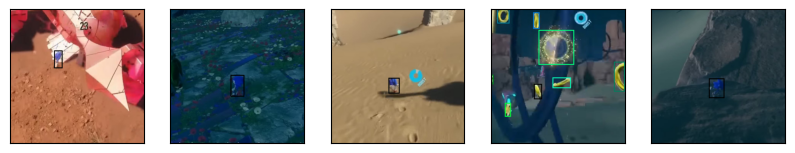

In [8]:
plt.figure(figsize = (10, 5), edgecolor = "black")
for i in range(5):
    image = boundsOnImage(datasetPath, sonicDF["Image"][i], sonicDF)
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)

## Splitting Training and Test Data